# 2019-05-14 (martes)

---

#### Hoy:

- Recursión
- Teoria de grafos


### Recursión

Ya vimos en clases anteriores el uso de *for* y *while* para realizar operaciones iterativas, que se realizarían hasta que agotar una lista inicial (*for*) o hasta que se cumpla una condición (*while*). 

**Recursión** es una técnica que también nos permite instruir al computador realizar "repeticiones", pero esta vez sin definir tan explicitamente cuándo acaban la repeticiones. Veamos un ejemplo:

In [13]:
def factorial(n):
    '''
    Entrega el resultado de n!
    '''
    resultado = 1
    
    for i in range(1, n+1):
        resultado = resultado * i
        
    return resultado

In [14]:
help(factorial)

Help on function factorial in module __main__:

factorial(n)
    Entrega el resultado de n!



In [ ]:
factorial(4)

In [26]:
def factorial_recursivo(n):
    '''
    Entrega el resultado de n!
    '''
    print('estoy empezando en n =', n)

    if n == 0:
        resultado = 1
        return resultado
    
    resultado = n * factorial_recursivo(n - 1)

    
    return resultado

In [27]:
factorial_recursivo(3)

estoy empezando en n = 3
estoy empezando en n = 2
estoy empezando en n = 1
estoy empezando en n = 0


6

In [33]:
class Lista:
    def __init__(self, value):
        self.inicio = value
        self.resto_de_lista = None
    
    def pegar_valor(self, valor):
        if self.resto_de_lista is None:
            self.resto_de_lista = Lista(valor)
        else:
            self.resto_de_lista.pegar_valor(valor)
            
    def __repr__(self):
        return '{}-{}'.format(self.inicio, self.resto_de_lista)
#por completar

In [34]:
s = Lista(6)

s.pegar_valor(3)

s.pegar_valor(8)

s

6-3-8-None

In [10]:
s.insert(3)
s

2-3-None

In [12]:
s.insert(10)
s

2-3-10-10-None

#### Ejercicio en clase:

Complete las funciones del objeto Tree que se describe a continuación

In [28]:
class Tree():

    def __init__(self, data):

        self.left = None
        self.right = None
        self.data = data
        

    def insert(self, datonuevo):
        
        #datos menores a self.data, los insertamos a la izquierda
        if datonuevo < self.data:
            if self.left is None:
                self.left = Tree(datonuevo)
            else:
                self.left.insert(datonuevo)
        
        #datos mayores a self.data, los insertamos a la derecha
        elif datonuevo > self.data:
            if self.right is None:
                self.right = Tree(datonuevo)
            else:
                self.right.insert(datonuevo)
            
    def total(self):
        '''
        devuelve el total (suma) de valores del arbol
        '''
        if self.left is None:
            izq = 0
        else:
            izq = self.left.total()
            
        if self.right is None:
            der = 0
        else:
            der = self.right.total()
            
        total = self.data + izq + der
        
        return total
   
    
    def sort_print(self):
        out = ''
        
        if self.left:
            out += '/' + self.left.sort_print()
        
        out += '/' + str(self.data)
        
        if self.right:
            out += '/' + self.right.sort_print()
        
        return out
    
    def sorted_list(self):
        out = []
        
        if self.left:
            out.extend(self.left.sorted_list())
        
        out.append(self.data)
        
        if self.right:
            out.extend(self.right.sorted_list())
        
        return out

    def find_end_nodes(self):
        '''
        devuelve los valores de los nodos "finales"
        '''
        
        finals = []
        
        #llegue a un nodo "final"
        if self.left is None and self.right is None:
            finals.append(self.data)
            return finals
        
        if self.left is not None:
            finals_izq = self.left.find_end_nodes()
            finals.extend(finals_izq)
            
        if self.right is not None:
            finals_der = self.right.find_end_nodes()
            finals.extend(finals_der)
        
        return finals
    
    def print_tree(self, tabs=""):
        '''
        funcion auxiliar para imprimir el arbol
        '''
        s = "{}{}".format(tabs, self.data)
        
        if self.left is not None:
            s += "\n" + self.left.print_tree(tabs+"    ")
        
        if self.right is not None:
            s += "\n" + self.right.print_tree(tabs+"    ")
    
        return s
    
    def __repr__(self):
        return self.print_tree()

t1 = Tree(3)

t1.insert(5)

t1.insert(7)

t1.insert(2)

t1.insert(4)

t1.insert(-10)
t1

3
    2
        -10
    5
        4
        7

In [29]:
t1.sort_print()

'///-10/2/3///4/5//7'

### Teoria de grafos

La teoria de grafos es la rama de la matemática que estudia los Grafos. Los Grafos son estructuras matemáticas ("estructuras de datos") pensadas para modelar relaciones entre objetos. Típicamente, los objetos son llamados "nodos" o "vértices" y los tipos de relaciones se describen mediante "conexiones", "links" o "edges". 

En Python, ocuparemos la librería **networkx** para trabajar con Grafos. Veamos algunos ejemplos:


C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib

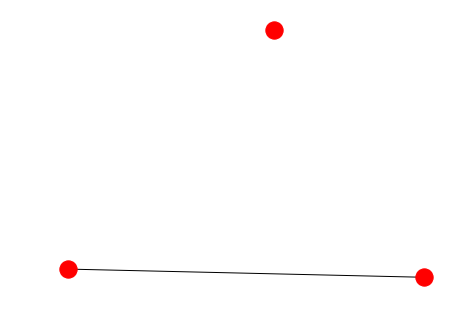

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node(1)
G.add_node(5)
G.add_node(7)
G.add_edge(1, 5, weight=3)


nx.draw(G)
plt.show()